# Advance Regression
In this notebook on regression with scikit learn, I am going to describe and compare results of different types of regression **Simple linear regression**, **Multiple linear regression**, **Ridge**, **Lasso** and **ElasticNet**. To know more about these regression types read this [article](https://www.analyticsvidhya.com/blog/2015/08/comprehensive-guide-regression/). Along with regression models, I've also written their **hypothesis function h(x)** and **cost functions**. In this notebook we're going to use data of boston houses, To know more about data [click here](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html). Let's begin
Below is the hypothesis function of Simple linear regression.
$$h(x) = \beta_0 + \beta_1x_1$$
$where$, $$\beta: Parameters\:or\:Slope$$
$$x_1: Feature$$

In [2]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
sns.set_style('darkgrid')
%matplotlib inline

### Loading Dataset

In [3]:
boston = datasets.load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [4]:
print('Features in our dataset:')
boston['feature_names']

Features in our dataset:


array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='<U7')

### Creating Pandas dataframe for data analysis

In [5]:
df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
df.shape

(506, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


### Plotting data

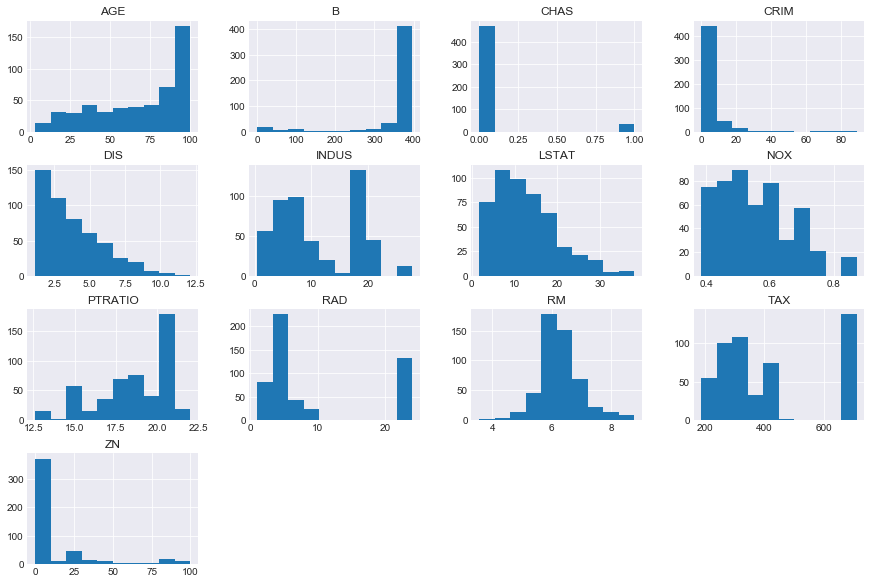

In [9]:
df.hist(figsize=(15,10));

In [10]:
X_rooms = df['RM'].values.reshape(-1,1) #This is how you do reshape in pandas
y1 = boston['target'].reshape(-1,1) #Reshaping in numpy array
print(X_rooms.shape)
y1.shape

(506, 1)


(506, 1)

### Importing linear model from scikit learn

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Simple Linear
In simple linear regression, we're are going to use only 1 feature **Average no. of rooms** to predict our response variable.
Cost function of linear regression is also called **ordinary least squares or OLS**.
$$Cost\:Function\:or\:OLS\:or\:RSS: min_{(\beta_0, \beta_i)}\:\frac{1}{2n}\sum_{n = 1}^{n}(h(x) - y)^2$$
$where$, $$RSS: Residual\:Sum\:of\:squares$$

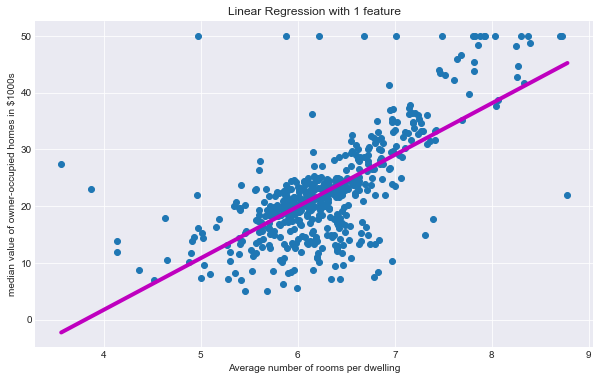

In [12]:
lm_1 = LinearRegression()
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1)
lm_1.fit(X_rooms,y1)
pred = lm_1.predict(prediction_space)
plt.figure(figsize=(10,6))
plt.scatter(X_rooms, y1);
plt.plot(prediction_space, pred, color='m', linestyle='-', linewidth=4);
plt.title('Linear Regression with 1 feature')
plt.xlabel('Average number of rooms per dwelling');
plt.ylabel('median value of owner-occupied homes in $1000s');
plt.show()

## Multiple Linear
From now on we're going to use all 13 of our features to predict our response. Multiple linear regression also uses **RSS** as cost function but our hypothesis function will be this.
$$h(x) = \beta_0 + \beta_1x_1 + \beta_2x_2.....\beta_{13}x_{13}$$

In [13]:
X = df
y = boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
pred = lm.predict(X_test)
score = lm.score(X_test, y_test)
square_error = mean_squared_error(y_test, pred)
print('R^2: {}'.format(score))
print('Root Mean Squared Error or MSE: {}'.format(np.sqrt(square_error)))

R^2: 0.7122678067990278
Root Mean Squared Error or MSE: 4.674549592495709


### Plotting Coefficient

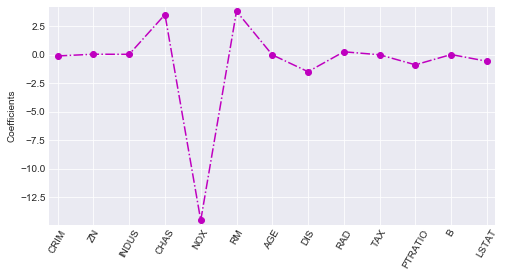

In [15]:
plt.figure(figsize=(8,4))
plt.plot(range(len(df.columns)), lm.coef_, marker='o', linestyle='-.',color='m');
plt.xticks(range(len(df.columns)), df.columns, rotation=60);
plt.ylabel('Coefficients')
plt.margins(0.02)

## Ridge
Ridge is type of regularized regression. We generally use regularization to prevent the effect of multicollinearity on our model. Ridge uses L2 regularization method. In cost function of Ridge we add penalty term '$\lambda$' to our usual **RSS**.

Since we have to set the tuning parameter $\lambda$, we use scikit learn **GridSearchCV** to find the best alpha. Scikit Learn also has **RandomizedSearchCV** to do the same thing little differently. To know more about GridSearchCV, read [the docs](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
$$Cost\:Function: RSS + \lambda\sum_{n = 1}^{n}\beta_{i}^{2}$$
$where$,$$\lambda: Alpha\:or\:Tuning\:Parameter$$

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
alpha = np.linspace(0.001, 1.01, 10)
param_grid = {'alpha':alpha,'normalize':[True, False]}
ridge = Ridge()
grid_ridge = GridSearchCV(ridge, param_grid, cv=5)

In [17]:
grid_ridge.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-03,   1.13111e-01,   2.25222e-01,   3.37333e-01,
         4.49444e-01,   5.61556e-01,   6.73667e-01,   7.85778e-01,
         8.97889e-01,   1.01000e+00]), 'normalize': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [18]:
grid_ridge.best_params_

{'alpha': 0.001, 'normalize': True}

In [19]:
Grid_ridge_pred = grid_ridge.predict(X_test)
Grid_ridge_score = grid_ridge.score(X_test,y_test)
Grid_Ridge_square_error = mean_squared_error(y_test, Grid_ridge_pred)
print('R^2: {}'.format(Grid_ridge_score))
print('Root Mean Squared Error or MSE: {}'.format(np.sqrt(Grid_Ridge_square_error)))

R^2: 0.7122227580828836
Root Mean Squared Error or MSE: 4.674915512995514


### Plotting Coefficient

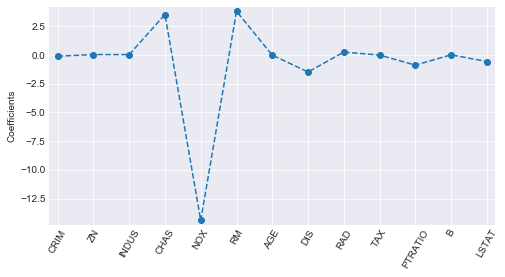

In [20]:
plt.figure(figsize=(8,4))
plt.plot(range(len(df.columns)), grid_ridge.best_estimator_.coef_, marker='o', linestyle='--');
plt.xticks(range(len(df.columns)), df.columns, rotation=60);
plt.ylabel('Coefficients')
plt.margins(0.02)

## Lasso
Lasso is another type of regularized regression. Lasso uses L1 regularization method. Lasso also helps in feature selection. Cost function of Lasso is similar to Ridge except it penalize the absolute values of coefficients.

To know more about L1 & L2 regularization click [here](https://www.quora.com/What-is-the-difference-between-L1-and-L2-regularization-How-does-it-solve-the-problem-of-overfitting-Which-regularizer-to-use-and-when)
$$Cost\:Function: RSS + \lambda\sum_{n = 1}^{n}|\beta_{i}|$$
$where$, $$\lambda = Alpha\:or\:Tuning\:Parameter$$

In [21]:
from sklearn.linear_model import Lasso
param_grid_1 = {'alpha':alpha, 'normalize':[True, False]}
lasso = Lasso()
grid_lasso = GridSearchCV(lasso, param_grid_1, cv=5)

In [22]:
grid_lasso.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-03,   1.13111e-01,   2.25222e-01,   3.37333e-01,
         4.49444e-01,   5.61556e-01,   6.73667e-01,   7.85778e-01,
         8.97889e-01,   1.01000e+00]), 'normalize': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [23]:
grid_lasso.best_params_

{'alpha': 0.001, 'normalize': True}

In [24]:
Grid_lasso_pred = grid_lasso.predict(X_test)
Grid_lasso_score = grid_lasso.score(X_test,y_test)
Grid_Lasso_square_error = mean_squared_error(y_test, Grid_lasso_pred)
print('R^2: {}'.format(Grid_lasso_score))
print('Root Mean Squared Error or MSE: {}'.format(np.sqrt(Grid_Lasso_square_error)))

R^2: 0.7115805331342224
Root Mean Squared Error or MSE: 4.680129049265434


### Plotting Coefficient

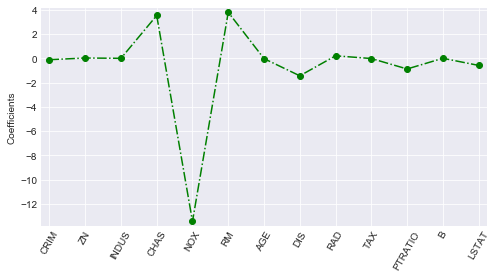

In [25]:
plt.figure(figsize=(8,4))
plt.plot(range(len(df.columns)), grid_lasso.best_estimator_.coef_, marker='o', linestyle='-.', color='g');
plt.xticks(range(len(df.columns)), df.columns, rotation=60);
plt.ylabel('Coefficients')
plt.margins(0.02)

## ElasticNet
ElasticNet is a combination of both Ridge & Lasso, ElasticNet uses both L1 & L2 regularization methods. In cost function of ElasticNet in addition to $\lambda$, we also have to specify **L1-ratio** denoted by $\rho$. [Docs](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)
$$Cost\:Function: RSS + \lambda\rho\:||\beta_{i}|| + \lambda\frac{(1 - \rho)}{2}||\beta_{i}^{2}||$$
$where$, $$\lambda = Alpha$$
$$\rho = L1-ratio$$

In [26]:
from sklearn.linear_model import ElasticNet
l1_ratio = np.linspace(0.5,1,5)
param_grid_2 = {'alpha':alpha, 'l1_ratio':l1_ratio, 'normalize':[True, False]}
elastic = ElasticNet()
grid_elastic = GridSearchCV(elastic, param_grid_2, cv=5)

In [27]:
grid_elastic.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-03,   1.13111e-01,   2.25222e-01,   3.37333e-01,
         4.49444e-01,   5.61556e-01,   6.73667e-01,   7.85778e-01,
         8.97889e-01,   1.01000e+00]), 'l1_ratio': array([ 0.5  ,  0.625,  0.75 ,  0.875,  1.   ]), 'normalize': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [28]:
grid_elastic.best_params_

{'alpha': 0.001, 'l1_ratio': 0.875, 'normalize': True}

In [29]:
Elastic_pred = grid_elastic.predict(X_test)
Elastic_score = grid_elastic.score(X_test,y_test)
Elastic_square_error = mean_squared_error(y_test, Elastic_pred)
print('R^2: {}'.format(Elastic_score))
print('Root Mean Squared Error or MSE: {}'.format(np.sqrt(Elastic_square_error)))

R^2: 0.7086306753304252
Root Mean Squared Error or MSE: 4.7040015615169954


### Plotting Coefficients

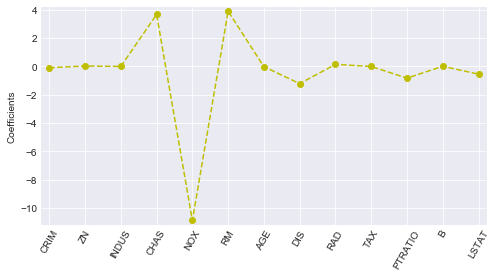

In [32]:
plt.figure(figsize=(8,4))
plt.plot(range(len(df.columns)), grid_elastic.best_estimator_.coef_, color='y', marker='o', linestyle='--');
plt.xticks(range(len(df.columns)), df.columns, rotation=60);
plt.ylabel('Coefficients')
plt.margins(0.02)

## Comparison of Cross-Validation Scores

In [31]:
M_linear_cv = cross_val_score(lm, X_test, y_test, cv=5)
Ridge_cv = cross_val_score(grid_ridge, X_test, y_test, cv=5)
Lasso_cv = cross_val_score(grid_lasso, X_test, y_test, cv=5)
Elastic_cv = cross_val_score(grid_elastic, X_test, y_test, cv=5)
print('Average CV_Scores 0f Simple Multiple Linear Regression: {}'.format(np.mean(M_linear_cv)))
print('Average CV_Scores Of Ridge Regression: {}'.format(np.mean(Ridge_cv)))
print('Average CV_Scores Of Lasso Regression: {}'.format(np.mean(Lasso_cv)))
print('Average CV_Scores Of ElasticNet Regression: {}'.format(np.mean(Elastic_cv)))

Average CV_Scores 0f Simple Multiple Linear Regression: 0.6293396401810322
Average CV_Scores Of Ridge Regression: 0.6415894716668079
Average CV_Scores Of Lasso Regression: 0.6191629623768182
Average CV_Scores Of ElasticNet Regression: 0.6162620574794376


We can clearly see **Ridge** is generalizing far better than all the other regression types.